<a href="https://colab.research.google.com/github/GioAcosta1/Generacion-de-texto/blob/main/PREDICCION_DE_TEXTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica #3: Modelo para generación de texto**

*Centro Universitario de Ciencias Exactas e Ingenierías*

*División de Tecnologías para la Integración Ciber-Humana*

*Ingeniería Biomédica*

<br>

*Mtra. Sofía Alejandra Aguilar Valdez*

14 de octubre de 2022

## **Información del equipo**

```NOMBRES:```

Acosta Martínez Edgar Giovanni 

Ochoa Ávila César Alberto

Zamora Muñoz Josafat 

```CÓDIGOS:```

216590878

217768298

221349402

```LINK REPOSITORIO:```



## **Contenido**



1.   Resumen
2.   Marco teórico
3.   Objetivos
4.   Materiales y métodos
5.   Resultados
6.   Discusión
7.   Conclusiones
8.   Referencias



# **1. Resumen**
La Inteligencia Artificial (IA) nació en la década de los 50’s, y se describe como el proceso de automatizar las tareas intelectuales que son realizadas por los seres humanos. El Deep Learning o Aprendizaje Profundo es una rama de la Inteligencia Artificial que se basa en un subconjunto de algoritmos de aprendizaje automático que intentan modelar niveles altos de abstracción en los datos. El tema de este trabajo, las Redes Neuronales Recurrentes, son modelos usados ampliamente en el sector de Deep Learning para el análisis de secuencias o señales donde es muy importante tener en cuenta el pasado o el futuro. Para la implementación del modelo se hizo uso de Project Gutenberg para obtener el libro de Frankenstein y a partir de el mismo generar una red recurrente que pueda predecir texto en base a diferentes párrafos y/o capítulos del libro.

# **2. Marco teórico**


**Redes Neuronales Recurrentes para la predicción de texto**

En este cuaderno de Colaboratory se construyo un modelo de predicción de texto en base a una red neuronal recurrente con el fin de generar texto en base al famoso libro de Frankenstein. 
La particularidad de las Redes Neuronales Recurrentes esta en el tipo de datos que pueden analizar. Las redes recurrentes tienen la capacidad de analizar. Las redes neuronales recurrentes (RNN) pueden procesar tanto a la entrada como a la salida secuencias sin importar su tamaño, y además teniendo en cuenta la correlación existente entre los diferentes elementos de esa secuencia.
Un modo más intuitivo de ver el funcionamiento de las redes recurrentes es desarrollándolas a lo largo del tiempo, en cada time step, la neurona recibe el dato de entrada correspondiente y, además, la salida del time step anterior. Este funcionamiento permite a la red recordar información de secuencias anteriores a la hora de procesar los datos del time step actual.

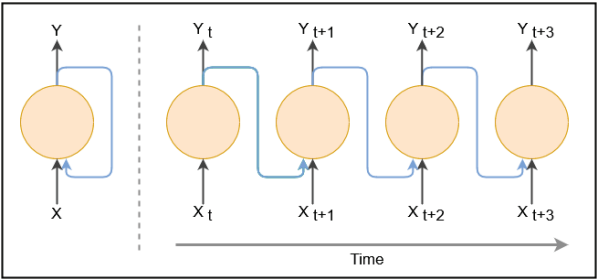

Debido a la necesidad de una amplia base de datos previamente clasificada, se hizo uso de el libro mencionado como fuente de datos. Se procesara para obtener datos suficientes. El principio sera a base de predicción por palabras que serán obtenidas en una cadena, las cuales formaran párrafos. Se romaron elementos del libro y se decodificarlo a su formato ASCII  (Estándar de Código Americano para el Intercambio de Información). Con el código ya decodificado se arregló en lotes de datos para alimentar la red, sin embargo, debido a que es una red supervisada (en la que se le enseña a la red que hacer con la información) se alistaran “etiquetas” para informarle sobre las respuestas esperadas, dichas etiquetas serán básicamente la predicció, es decir, la respuesta de texto consecutiva que fue dada a la red. Posteriormente se generaron matrices de datos de la forma deseada (según el tamaño del lote a procesar) y posteriormente los se realizó la conversión a “tensores” (un tipo de matriz de datos especiales para el procesamiento en redes neuronales artificiales).

Para la construcción del modelo y preparación de los datos se utilizó el lenguaje Python con apoyo de la librería especializada en creación de redes neuronales artificiales Pytorch además de librerías para complementar el procesamiento matemático necesario a los datos obtenidos (librerias como numpy, matplot entre otras). Se aplicaron las redes neuronales recurrentes debido a que se necesita realizar “predicciones” para la generación automatica de texto y la red necesitara “recordar” la información de un instante de tiempo previo para generar el que cree sera la siguiente información en secuencia.

# **3. Objetivos**
El objetivo principal de esta práctica consiste en investigar e implementar las técnicas de Deep Learning y en concreto las redes neuronales artificiales recurrentes (RNN) como herramienta para la predicción y generación automática de texto. Para lograrlo sera necesario:

**1)** Procesar el libro para obtener una base de datos en forma correcta para la red

**2)** Etiquetar la información obtenida del procesamiento del libro para poder supervisar el 	entrenamiento de la red

**3)** Definir la forma e hiperparametros adecuados con pruebas empíricas en el mismo.

# **4. Materiales y métodos**

## *Materiales*

Se utiliza el libro Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley [[1]](https://www.gutenberg.org/ebooks/42324) para generar las secuencias de entrada y las secuencias de salida del modelo de red neuronal recurrente (RNN).

Cuenta con 6972 líneas de texto, con un total de 456002 palabras. El set de datos presenta 58 carácteres distintos, los cuales sirven para la comparación en el entrenamiento con la predicción de la RNN.
## *Métodos*

**Esquema de la metodología implementada**

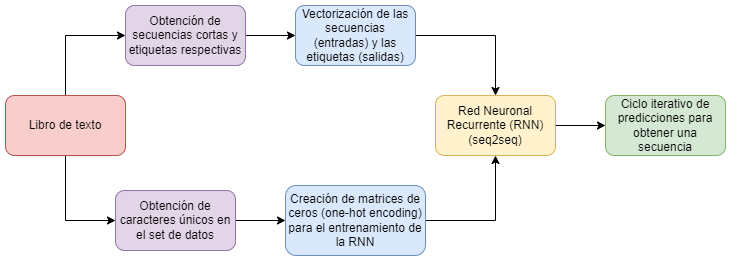

**Descripción de métodos en forma de código**

# **Preprocesamiento de los datos**

In [1]:
#Importación de las librerias
from __future__ import print_function
from keras.models import Sequential
from keras.layers.rnn import SimpleRNN
from keras.layers import Dense
from keras.utils import vis_utils
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Importación del libro y su almacenamiento en una variable
alice = open('/content/drive/MyDrive/DEEP LEARNING/books/FRANK.txt', 'rb') #Leemos el libro
lines = []
for line in alice: #Iteramos a partir de cada línea del libro
    line = line.strip().lower() #Quitamos espacios y convertimos todo a minusculas
    line = line.decode('ascii', 'ignore') #Decodificamos cada linea en formato Ascci
    if len(line)==0:
        continue
    lines.append(line) #Agregamos cada linea a la lista lines
alice.close() #Cerramos el archivo del libro
text = " ".join(lines) #Juntamos todas las líneas en una variable

In [12]:
len(text)

456002

In [13]:
#Creación de los sets de comparación para la RNN
chars = set([c for c in text]) #Encontramos todos los carácteres únicos en el libro
len_chars = len(chars) #Obtenemos cuántos carácteres diferentes existen en el set de datos
chars2index = dict([(c, i) for i, c in enumerate(chars)]) #Creamos un diccionario con los carácteres como Keys
index2chars = dict([(i, c) for i, c in enumerate(chars)]) #Creamos un diccionario con los carácteres como Values

In [14]:
len_chars

58

In [ ]:
#Creación de las entradas y las etiquetas de salida
SEQ_LEN = 10 #Definimos el tamaño de la secuencia de carácteres
STEP = 1 #Definimos el tamaño del paso a recorrer para la generación de una nueva secuencia
input_chars = []
label_chars = []
for i in range(0, len(text)-SEQ_LEN, STEP): #Iteramos sobre los carácteres del libro
    input_chars.append(text[i:i+SEQ_LEN]) #Obtenemos los 10 carácteres para la entrada
    label_chars.append(text[i+SEQ_LEN]) #Obtenemos el carácter para la salida

In [ ]:
#Creamos vectores de ceros booleanos a partir de las entradas
x = np.zeros((len(input_chars), SEQ_LEN, len_chars), dtype=np.bool_)
y = np.zeros((len(input_chars), len_chars), dtype=np.bool_)

for i, input_char in enumerate(input_chars): #Iteramos sobre cada secuencia de 10 carácteres
    for j, ch in enumerate(input_char): #Iteramos sobre cada carácter individual en la secuencia
        x[i,j, chars2index[ch]] = 1 #One-Hot Encoding
    y[i, chars2index[label_chars[i]]] = 1 #One-Hot Encoding

In [ ]:
# Definición de hiperparámetros

HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 60
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 50

#**Creación del modelo RNN**

In [ ]:
# Creación del modelo RNN
model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences = False, input_shape=(SEQ_LEN, len_chars), unroll=True))
model.add(Dense(len_chars, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo y visualización de las predicciones a través de las épocas
for iteration in range(NUM_ITERATIONS):
    print('='*50)
    print("Iteration #: %d"%(iteration))
    model.fit(x, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    print("Generating text from the seed : %s \n"%(test_chars))
    print(test_chars, end='')
    for i in range(NUM_PREDS_PER_EPOCH):
        X_test = np.zeros((1, SEQ_LEN, len_chars))
        for i, ch in enumerate(test_chars):
            X_test[0, i, chars2index[ch]] = 1
        pred = model.predict(X_test, verbose=False)[0]
        y_pred = index2chars[np.argmax(pred)]
        print(y_pred, end='')
        test_chars=test_chars[1:] + y_pred
print()


In [ ]:
#Visualización de las predicciones a partir de secuencias nuevas para la RNN
test_chars = "the day wa"
for i in range(40):
    X_test = np.zeros((1, SEQ_LEN, len_chars))
    for i, ch in enumerate(test_chars):
        X_test[0, i, chars2index[ch]] = 1
    pred = model.predict(X_test, verbose=False)[0]
    y_pred = index2chars[np.argmax(pred)]
    print(y_pred, end='')
    test_chars=test_chars[1:] + y_pred

s so restore the s

# **5. Resultados**

A primer instancia, hay que remarcar que debido a que se decidió mapear el libro carácter a carácter la red predice letra por letra de manera secuencial según lo solicitado como muestra inicial, obtenemos un tipo de resultado muy distinto al que se pudiera obtener si se mapeaba el libro palabra a palabra, por lo que, ese nivel de abstracción por ser mas alto, sostendría resultados diferentes producto de un sesgo muy distinto al del enfoque que se decidió dar en este modelo.


Se entrenó al modelo con las siguientes características, Hidden size de 250, Batch size de 250, 60 iteraciones con una época en cada iteración y con un número de predicciones por epoca de 100 (los cuales sirvieron para visualizar el avance en el entrenamiento de la red).

Se obtiene un acurracy de 0.6173 para el entrenamiento. Por su parte la perdida se encuentra elevada pero disminuye con el paso del tiempo. 


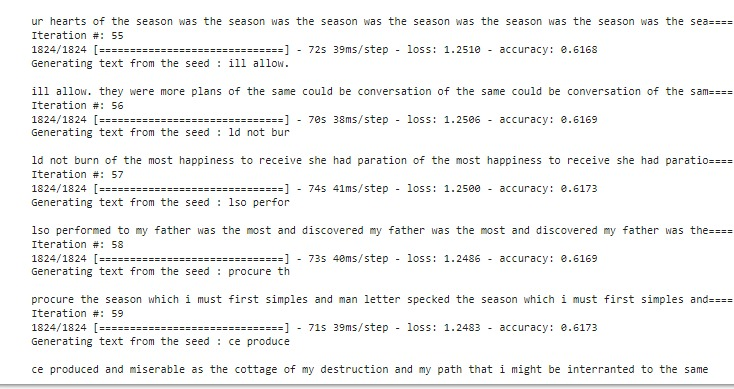

Se noto un patrón de generación relacionado a la sentencia “Project Gutenberg” el cual provocaba que la red del modelo 1 cayera en un ciclo de predicción infinito relacionado a dicha sentencia. En este caso particular esta sentencia se mantiene presente a pesar de proporcionarle a la red sentencias nuevas de referencia.

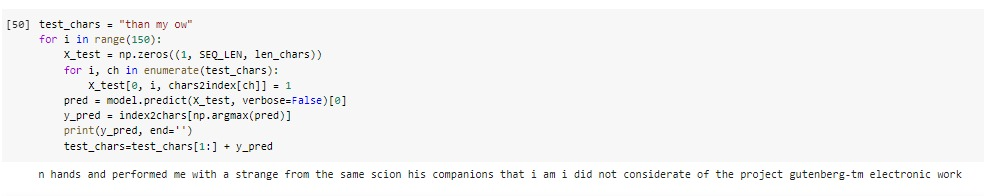

En el segundo modelo tambien se obtuvieron ciclos de prediccion infinitos entorno a 1 misma sentencia, pero a diferencia del primer modelo, en el segundo la sentencia repetida es diferente para cada sentencia de referencia proporcionado a la red.

# **6. Discusión**

El modelo evidencia claras señales de underfitting, como muestras principales son las pocas cadenas de caracteres (menos de 50 en promedio) que es capaz de predecir en promedio antes de caer en un bucle infinito (como el modelo 2, en el cual se evidencia mas, con menos de 20 en promedio).
Es muy posible que una entrada mayor con un batch size mucho mas robusto pueda solucionar esta problemática, sin embargo, si se pretende solucionar se debe tomar en cuenta que la red esta siendo entrenada para predicción con base al libro, por lo que los datos de entrenamiento para la red no son todo el libro (ya que eso seria caer en un caso contrario, overfitting). 
Muy posiblemente se deba limitar los datos de entrenamiento a tres cuartas partes del libro, o la mitad, para dejar cabida a una real predicción y no solo una memorización total del libro en la red.

Hamarashid (2022) menciona la necesidad de incrementar el set de dato existente para cualquier tipo de entrenamiento de redes neuronales recurrentes. Esto mediante la duplicación de palabras de una novela. En su trabajo, obtuvieron un valor de precisión del 88.2 % con 98,000 épocas. Esto mediante un entrenamiento con dos capas ocultas y cada capa con 128 neuronas. La tasa de aprendizaje fue ajustada a 0.001.
Debido a la poca cantidad de épocas utilizadas para el entrenamiento, el modelo utilizado en el presente documento para la predicción de texto no presenta una precisión óptima en cuanto a sus predicciones. Existe una diferencia grande en cuanto a las épocas utilizadas por Hamarashid (2022).
Para el entrenamiento, existe una ventaja de usar una gran cantidad de secuencias relativamente cortas en lugar de una secuencia largas, ya que aumenta en gran medida los valores de entrada de la red y mejora el aprendizaje de la misma (Sutskever, 2011).

El modelo de RNN simple implementado para predecir texto a partir de una secuencia de entrada, logra generar un resultado con dos componentes característicos. En primer lugar, identifica la mejor forma de completar la oración a partir de las últimas letras que compongan las secuencia de entrada. No obstante, llega un punto en la predicción donde, aunque siga generando más predicciones, entra en un tipo de ciclo de retroalimentación que provoca una salida que no cambia. Esto se debe a las pocas épocas de entrenamiento del modelo.



# **7. Conclusiones**
Esta propuesta de modelo demostró la capacidad de las redes recurrentes para predecir patrones, como lo pueden ser ciertos fragmentos de texto, los resultados fueron como se esperaban y similares a los resultados obtenidos en modelos similares, lo cual es un punto a favor para el modelo, no obstante, una de las mayores limitaciones fue un patrón generado por la misma red el cual llevaba a la red a caer en ciclos repetitivos de predicción debido al underfitting y falta de entrenamiento en la red.

La red mostro una progresión lineal en sus avances, por lo que muy seguramente con un mayor numero de epocas y un batch size equilibrado (con referencia a las proporciones de los datos disponibles) se obtengan mejores resultados, pudiendo incluso predecir parrafos completos.
El modelo recurrente resulta ser de suma utilidad por sus caracteristicas intrinsecas de memoria

# **8. Referencias**

**[1]** Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley. (1818). Project Gutenberg. Recuperado 8 de octubre de 2022, de https://www.gutenberg.org/ebooks/42324

**[2]** (2022). Retrieved 13 October 2022, from http://revistaelectronica-ipn.org/ResourcesFiles/Contenido/24/TECNOLOGIA_24_000907.pdf


**[3]** (2022). Retrieved 13 October 2022, from https://oa.upm.es/63687/1/TFM_JUAN_JULIAN_CEA_MORAN.pdf

**[4]** Sutskever, H., Martens, J., & Hinton, G. (2011). Generating Text with Recurrent Neural Networks

**[5]** Hamarashid, H.K., Saeed, S.A. & Rashid, T.A. A comprehensive review and evaluation on text predictive and entertainment systems. Soft Comput (2022). https://doi.org/10.1007/s00500-021-06691-z

**[6]** Using RNN to predict text. (2019). https://github.com/parulc7/Alice-in-Wonderland/blob/master/SimpleRNN/alice_simplernn.py
